BREAST CANCER PREDICTION USING LINEAR REGRESSION

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 53.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:
import pandas as pd

df=pd.read_csv('/content/injury_data.csv')
df

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
...,...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0


In [ ]:
#glucose,ski,bp features
#bmi - target

features=df[['Player_Height', 'Previous_Injuries', 'Training_Intensity']]
target=df['Recovery_Time']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
#0.2 testing 20%


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.data_range_)
X_test=scaler.transform(X_test)


from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)
print(model.coef_)#m value
print(model.intercept_)#c inntercept / bias
print(model.predict([[175.732429,	1,0.457929]]))
#y=mx+c

[207.15946572   1.           0.99694942]
[1.45285701e+02 0.00000000e+00 3.07188454e-05]
[61.87376464  1.          0.9969187 ]
[ 0.29279709 -0.01651517 -0.32671867]
3.4723004887313573
[54.76011471]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
print('Accuracy in value:',r2_score(y_test,model.predict(X_test))*100,'%')
print('Accuracy in percentage',r2_score(y_test,model.predict(X_test)))

Accuracy in value: -0.33379787322789234 %
Accuracy in percentage -0.0033379787322789234


In [ ]:
#Model Evaluation
#1. MAE - Model Absolute Error = avg(sum(Absolute(Predicted(y))))

model.predict(X_test)
print(model.score(X_test,y_test))
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
print(r2_score(y_test,model.predict(X_test)))


-0.0033379787322789234
-0.0033379787322789234


In [ ]:

from sklearn import metrics
import numpy as np
y_pred=model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


Mean Absolute Error: 1.479791946602257
Mean Squared Error: 2.808719254213673
Root Mean Squared Error: 1.675923403444702


-0.0033379787322789234

In [ ]:
import pickle

#save
filename='linear_regression_model.pkl'
pickle.dump(model,open(filename,'wb'))

#Load
loaded_model=pickle.load(open(filename,'rb'))


In [ ]:
!pip install gradio matplotlib
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# Load the pre-trained model
try:
    model = pkl.load(open('linear_regression_model.pkl', 'rb'))
except FileNotFoundError:
    print("Error: Model file 'linear_regression_model.pkl' not found.")
    model = None  # Prevent execution errors

def predict_recoverymonth(Player_Height, Previous_Injuries, Training_Intensity):
    """Predicts Muscle Injury Recovery Time and generates a chart."""
    if model:
        # Ensure the model is trained with only three features
        prediction = model.predict([[Player_Height, Previous_Injuries, Training_Intensity]])[0]

        # 📊 Generate a bar chart for recovery time
        factors = ["Height", "Previous Injuries", "Training Intensity"]
        values = [Player_Height, Previous_Injuries, Training_Intensity]

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(factors, values, color=["blue", "green", "red"])
        ax.set_ylabel("Feature Values")
        ax.set_title(f"Recovery Time Prediction: {round(prediction, 2)} months")
        plt.xticks(rotation=45)

        return round(prediction, 2), fig  # Returning both the predicted value and the chart

    else:
        return "Model not loaded!", None

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_recoverymonth,
    inputs=[
        gr.Number(label="Height"),
        gr.Number(label="Previous Injuries"),
        gr.Number(label="Training Intensity"),
    ],
    outputs=[
        gr.Number(label="Recovery Month"),
        gr.Plot(label="Feature Impact on Recovery Time")  # Chart output
    ],
    title="Muscle Recovery Predictor with Chart Analysis",
    description="Enter the player details to predict recovery time and visualize the impact of different features."
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3df5d99c8acbab8f5c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict values for test data
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')  # Closer to 1 is better

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')  # Lower is better

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')  # Lower is better

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')  # Lower is better


R² Score: -0.00
Mean Absolute Error: 1.48
Mean Squared Error: 2.81
Root Mean Squared Error: 1.68


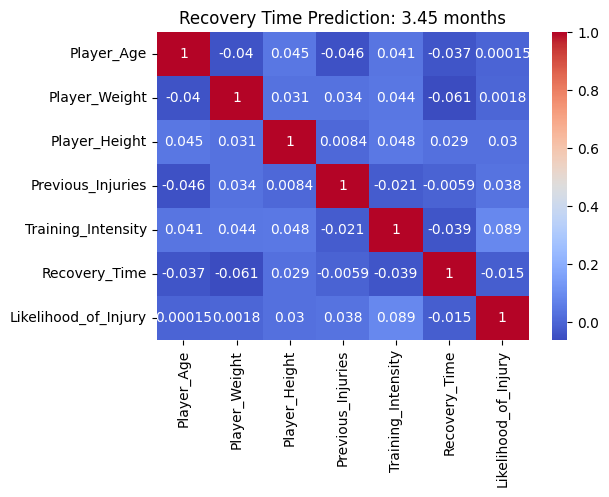

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))  # Check new R²


-0.24813342263898197


<Axes: xlabel='Recovery_Time'>

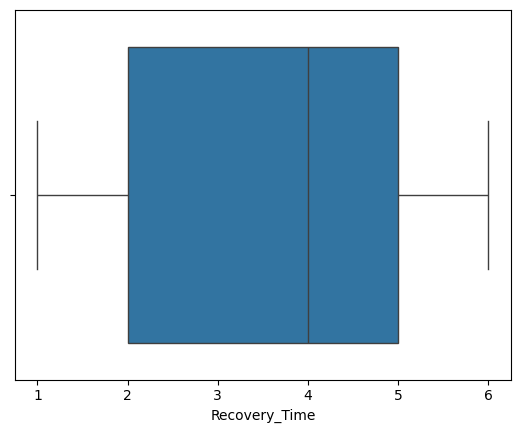

In [ ]:
import seaborn as sns

sns.boxplot(x=df["Recovery_Time"])  # Check for extreme values


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
print(poly_model.score(X_test, y_test))  # Check new R²


-0.0013141057029975034


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[['Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity']]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


              Feature  VIF Score
0       Player_Weight  51.044072
1       Player_Height  52.996236
2   Previous_Injuries   2.063208
3  Training_Intensity   3.956461
